## Dependencias

In [3]:
import seaborn
import pandas
import geopandas
from pysal.lib import weights
import numpy
import matplotlib.pyplot as plt

## Data
Barrios y Veredas
https://www.medellin.gov.co/geomedellin/datosAbiertos/234, https://www.medellin.gov.co/giscatalogacion/srv/spa/catalog.search#/metadata/61a04bc9-2991-4495-8491-7f18f40a2972

In [4]:
medellin = geopandas.read_file("data/barrios_y_veredas_mr.geojson")

In [5]:
medellin.head()

,OBJECTID,codigo,nombre,identificacion,limitecomunacorregimientoid,limitemunicipioid,subtipo_barriovereda,fecha_actualizacion,Shape_Length,Shape_Area,geometry
0,1,Inst_15,U.P.B,Inst_15,11,001,1,1418774400000,1872.110579,216519.300817,"POLYGON ((4713613.195 2248705.932, 4713601.395..."
1,2,Inst_18,Cerro Nutibara,Inst_18,16,001,1,1418774400000,2840.275369,399158.946697,"POLYGON ((4714984.017 2247909.523, 4714961.434..."
2,3,0610,Mirador del Doce,0610,06,001,1,1418774400000,1336.347402,64822.378858,"POLYGON ((4714157.227 2255420.732, 4714146.578..."
3,4,1620,El Nogal-Los Almendros,1620,16,001,1,1418774400000,3072.101126,248370.770989,"POLYGON ((4712900.496 2247841.179, 4712901.879..."
4,5,0612,El Triunfo,0612,06,001,1,1418774400000,1730.001961,117069.306574,"POLYGON ((4713973.756 2255960.810, 4713971.703..."


In [6]:
medellin.describe()

,OBJECTID,subtipo_barriovereda,fecha_actualizacion,Shape_Length,Shape_Area
count,332.000000,332.000000,3.320000e+02,332.000000,3.320000e+02
mean,166.500000,1.183735,1.418774e+12,4572.156419,1.133725e+06
std,95.984374,0.387852,0.000000e+00,4320.982615,2.512967e+06
min,1.000000,1.000000,1.418774e+12,750.570165,2.846434e+04
25%,83.750000,1.000000,1.418774e+12,2457.728552,2.397280e+05
50%,166.500000,1.000000,1.418774e+12,3073.160817,3.678561e+05
75%,249.250000,1.000000,1.418774e+12,4351.737949,6.578209e+05
max,332.000000,2.000000,1.418774e+12,34082.524583,2.223246e+07


## Pesos de contigüidad

### Contigüidad de torre

In [7]:
wr = weights.contiguity.Rook.from_dataframe(medellin)

/var/folders/kg/plkd97154_zf916xg8gj219h0000gn/T/ipykernel_7258/1801246121.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wr = weights.contiguity.Rook.from_dataframe(medellin)


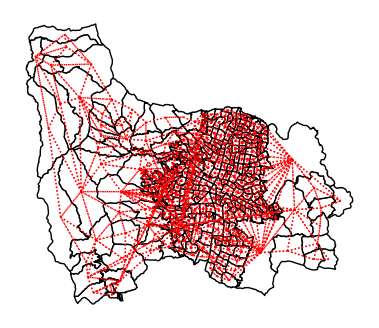

In [8]:
# Plot tract geography
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# Plot the geography
medellin.plot(
    edgecolor="k", facecolor="w", ax=ax
)

# Plot graph connections
wr.plot(
    medellin,
    ax=ax,
    edge_kws=dict(color="r", linestyle=":", linewidth=1),
    node_kws=dict(marker=""),
)

# Remove the axis
ax.set_axis_off()

In [9]:
pandas.DataFrame(*wr.full()).astype(int)

,0,1,2,3,4,5,6,7,8,9,...,322,323,324,325,326,327,328,329,330,331
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
328,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
wr.nonzero

1882

In [11]:
wr.neighbors

{0: [256, 140, 98, 164],
 1: [66, 56, 153, 92, 57],
 2: [291, 4, 40, 148, 52, 249, 187, 125],
 3: [16, 176, 102, 121, 140],
 4: [249, 2, 291, 125],
 5: [145, 274, 117, 277, 21, 174],
 6: [65, 33, 229, 297, 77, 46],
 7: [260, 54, 231, 200, 25, 106, 155],
 8: [105, 114, 111],
 9: [81, 146, 248, 12, 120, 238, 79],
 10: [259, 181, 317, 44, 301],
 11: [275, 165, 70, 200, 137],
 12: [81, 146, 131, 130, 162, 9],
 13: [272, 65, 289, 135, 221, 173],
 14: [132, 68, 55, 71, 123, 108, 94],
 15: [225, 66, 194, 153, 219],
 16: [305, 3, 164, 102, 57, 171],
 17: [18, 212, 310],
 18: [17, 212, 310, 311],
 19: [225, 66, 163, 258, 43, 171],
 20: [163, 179, 118, 217, 330, 43, 253],
 21: [51, 147, 277, 5, 228, 174],
 22: [273, 132, 167, 94, 78, 239],
 23: [152, 317, 150, 246],
 24: [192, 304, 180, 264, 235, 104, 287],
 25: [260, 7, 200, 175, 147, 245, 54, 90],
 26: [164, 153, 27, 110, 303],
 27: [240, 130, 196, 186, 26],
 28: [178, 116, 237, 302, 31],
 29: [161, 114, 115, 230, 296, 111],
 30: [113, 100, 38

<Axes: xlabel='Number of Neighbors', ylabel='Frequency'>

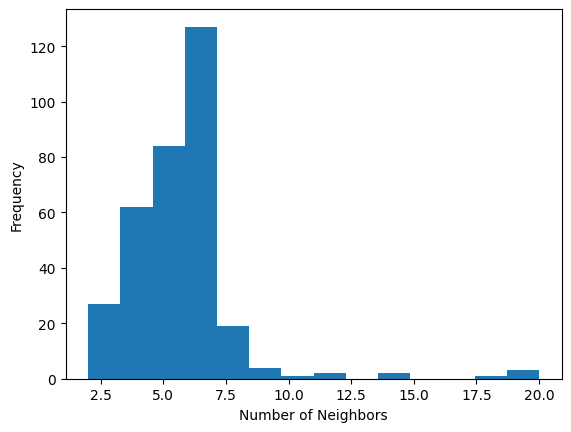

In [ ]:
s = pandas.Series(wr.cardinalities)
s.plot.hist(bins=s.unique().shape[0], xlabel="Number of Neighbors", ylabel="Frequency")

In [14]:
s[s > 15]

86     20
125    19
200    19
317    18
dtype: int64

### Contigüidad de reina

In [15]:
w_queen = weights.contiguity.Queen.from_dataframe(medellin)

/var/folders/kg/plkd97154_zf916xg8gj219h0000gn/T/ipykernel_7258/3199273579.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = weights.contiguity.Queen.from_dataframe(medellin)


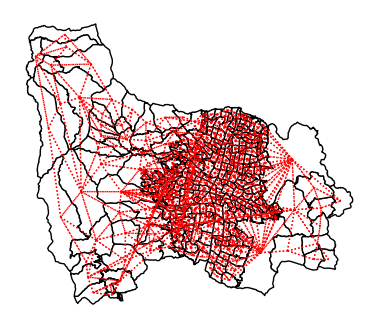

In [16]:
# Plot tract geography
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# Plot the geography
medellin.plot(
    edgecolor="k", facecolor="w", ax=ax
)

# Plot graph connections
w_queen.plot(
    medellin,
    ax=ax,
    edge_kws=dict(color="r", linestyle=":", linewidth=1),
    node_kws=dict(marker=""),
)

# Remove the axis
ax.set_axis_off()

In [17]:
print(w_queen.n)
print(w_queen.pct_nonzero) # Porcentaje de elementos distintos de cero

332
1.8326317317462621


<Axes: xlabel='Number of Neighbors', ylabel='Frequency'>

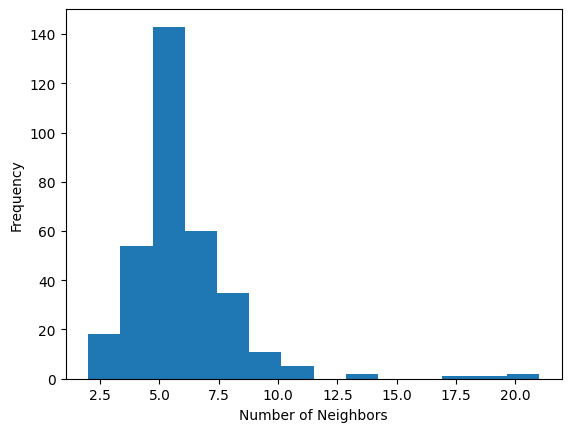

In [19]:
s = pandas.Series(w_queen.cardinalities)
s.plot.hist(bins=s.unique().shape[0], xlabel="Number of Neighbors", ylabel="Frequency")

In [20]:
s[s > 15]

86     21
125    20
200    19
317    18
dtype: int64

In [23]:
medellin.iloc[125]

OBJECTID                                                                     126
codigo                                                                      SN02
nombre                                                                Sin Nombre
identificacion                                                              SN02
limitecomunacorregimientoid                                                 SN02
limitemunicipioid                                                            001
subtipo_barriovereda                                                           2
fecha_actualizacion                                                1418774400000
Shape_Length                                                         7602.999842
Shape_Area                                                         132768.364148
geometry                       MULTIPOLYGON (((4716972.2313 2241523.572899997...
Name: 125, dtype: object

## Pesos basados en distancia

### k vecinos mas cercanos

In [ ]:

wk4 = weights.distance.KNN.from_dataframe(medellin, k=4)

In [ ]:
# Número de identificadores sin vecinos
wk4.islands

[]

In [ ]:
# Los vecinos mas cercanos serian
wk4.neighbors

{0: [157, 99, 222, 103],
 1: [201, 319, 2, 310],
 2: [267, 41, 156, 266],
 3: [189, 140, 192, 191],
 4: [120, 251, 257, 30],
 5: [235, 49, 158, 312],
 6: [292, 77, 245, 124],
 7: [285, 16, 13, 258],
 8: [23, 55, 273, 286],
 9: [298, 47, 153, 71],
 10: [14, 156, 57, 45],
 11: [276, 263, 7, 16],
 12: [15, 237, 329, 195],
 13: [7, 285, 16, 177],
 14: [10, 109, 310, 156],
 15: [12, 141, 329, 331],
 16: [7, 13, 285, 177],
 17: [297, 27, 322, 29],
 18: [90, 13, 258, 63],
 19: [142, 193, 31, 90],
 20: [250, 198, 220, 214],
 21: [244, 314, 118, 249],
 22: [250, 66, 295, 20],
 23: [286, 8, 273, 127],
 24: [318, 111, 253, 132],
 25: [327, 216, 84, 329],
 26: [101, 315, 260, 316],
 27: [17, 29, 297, 254],
 28: [342, 67, 59, 1],
 29: [27, 271, 254, 17],
 30: [159, 261, 242, 184],
 31: [312, 193, 317, 19],
 32: [137, 272, 219, 91],
 33: [188, 189, 275, 96],
 34: [257, 106, 4, 251],
 35: [113, 310, 109, 280],
 36: [321, 231, 151, 230],
 37: [237, 113, 280, 12],
 38: [243, 39, 304, 336],
 39: [38, 16

### Pesos de kernel
Reflejan el caso en el que se supone o se espera que la similitud o proximidad espacial disminuya con la distancia (pero ademas con una función de decaimiento).

In [ ]:
w_kernel = weights.distance.Kernel.from_dataframe(medellin)

In [ ]:
# Función de kernel implementada
w_kernel.function

'triangular'

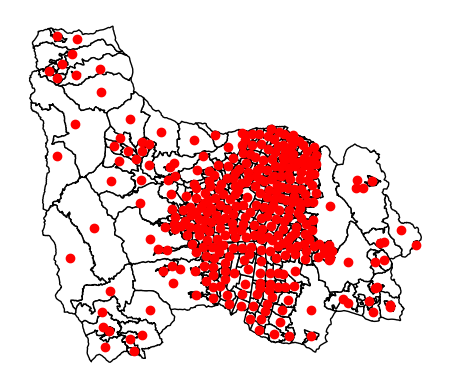

In [ ]:
# Centroides
# Plot polygons
ax = medellin.plot(facecolor="w", edgecolor="k")
# Create and plot centroids
medellin.centroid.plot(color="r", ax=ax)
# Remove axis
ax.set_axis_off();

In [ ]:
# Build weights with adaptive bandwidth
w_adaptive = weights.distance.Kernel.from_dataframe(
    medellin, fixed=False, k=25
)
# Para las observaciones separadas por distancias mayores que el ancho de banda, los pesos se establecen en cero

In [ ]:
w_adaptive.bandwidth[:5]

array([[10448.33616032],
       [ 2744.5768786 ],
       [ 2054.71012625],
       [ 5089.76748674],
       [ 3458.15551226]])

In [ ]:
# Pesos para el elemento 17 con otros elementos
w_adaptive[17]

{17: 1.0,
 297: 0.9016186231103032,
 27: 0.8467326922488215,
 322: 0.8270512477694171,
 29: 0.695379464085178,
 254: 0.6749748398885239,
 89: 0.6285525497237894,
 271: 0.502893491617225,
 234: 0.49463750081115176,
 183: 0.44896432031279565,
 296: 0.4156886651662344,
 287: 0.36706140607766646,
 255: 0.3246517819912743,
 233: 0.2769254239223802,
 227: 0.2651486733497571,
 49: 0.26013170931061036,
 212: 0.209596279903558,
 283: 0.19263394079927576,
 323: 0.15282841448658757,
 145: 0.1503239581614504,
 209: 0.06362476954795393,
 5: 0.049202478446175535,
 199: 0.04577019767212964,
 235: 0.04131676679493235,
 115: 0.004738305328344405,
 158: 9.99999901774018e-08}

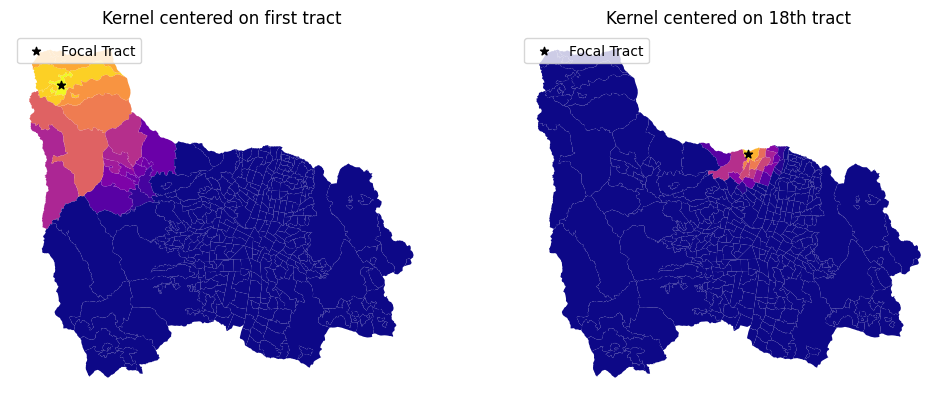

In [ ]:
# Create full matrix version of weights
full_matrix, ids = w_adaptive.full()
# Set up figure with two subplots in a row
f, ax = plt.subplots(
    1, 2, figsize=(12, 6), subplot_kw=dict(aspect="equal")
)
# Append weights for first polygon and plot on first subplot
medellin.assign(weight_0=full_matrix[0]).plot(
    "weight_0", cmap="plasma", ax=ax[0]
)
# Append weights for 18th polygon and plot on first subplot
medellin.assign(weight_18=full_matrix[17]).plot(
    "weight_18", cmap="plasma", ax=ax[1]
)
# Add centroid of focal tracts
medellin.iloc[[0], :].centroid.plot(
    ax=ax[0], marker="*", color="k", label="Focal Tract"
)
medellin.iloc[[17], :].centroid.plot(
    ax=ax[1], marker="*", color="k", label="Focal Tract"
)
# Add titles
ax[0].set_title("Kernel centered on first tract")
ax[1].set_title("Kernel centered on 18th tract")
# Remove axis
[ax_.set_axis_off() for ax_ in ax]
# Add legend
[ax_.legend(loc="upper left") for ax_ in ax]

## Fuentes de datos

- `https://www.medellin.gov.co/geomedellin/datosAbiertos?id=1044`